### Nama: Samuel Anugrah Hasiholan Sihombing
### NIM: 202331006

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Soal nomor 1

In [4]:
#Soal nomor 1
# Load gambar
img1 = cv2.imread("Nama.jpg")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

In [5]:
# Pisahkan channel warna BGR
b, g, r = cv2.split(img1)

# Deteksi warna merah dengan meniadakan kanal hijau dan biru
merah_only = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])

# Konversi ke grayscale untuk visualisasi dan histogram
merah_gray = cv2.cvtColor(merah_only, cv2.COLOR_BGR2GRAY)

# Deteksi warna hijau dengan meniadakan kanal biru dan merah
hijau_only = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])

# Konversi ke grayscale untuk visualisasi dan histogram
hijau_gray = cv2.cvtColor(hijau_only, cv2.COLOR_BGR2GRAY)

# Deteksi warna biru dengan meniadakan kanal hijau dan merah
biru_only = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])

# Konversi ke grayscale untuk visualisasi dan histogram
biru_gray = cv2.cvtColor(biru_only, cv2.COLOR_BGR2GRAY)

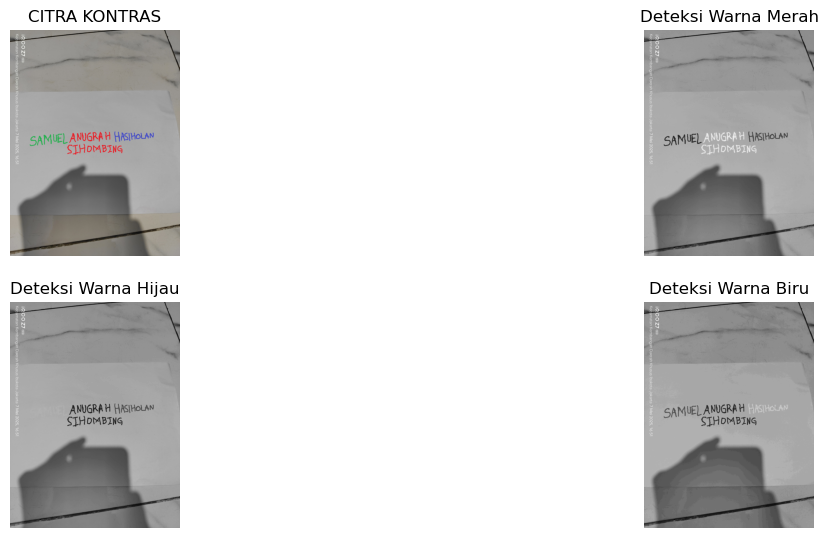

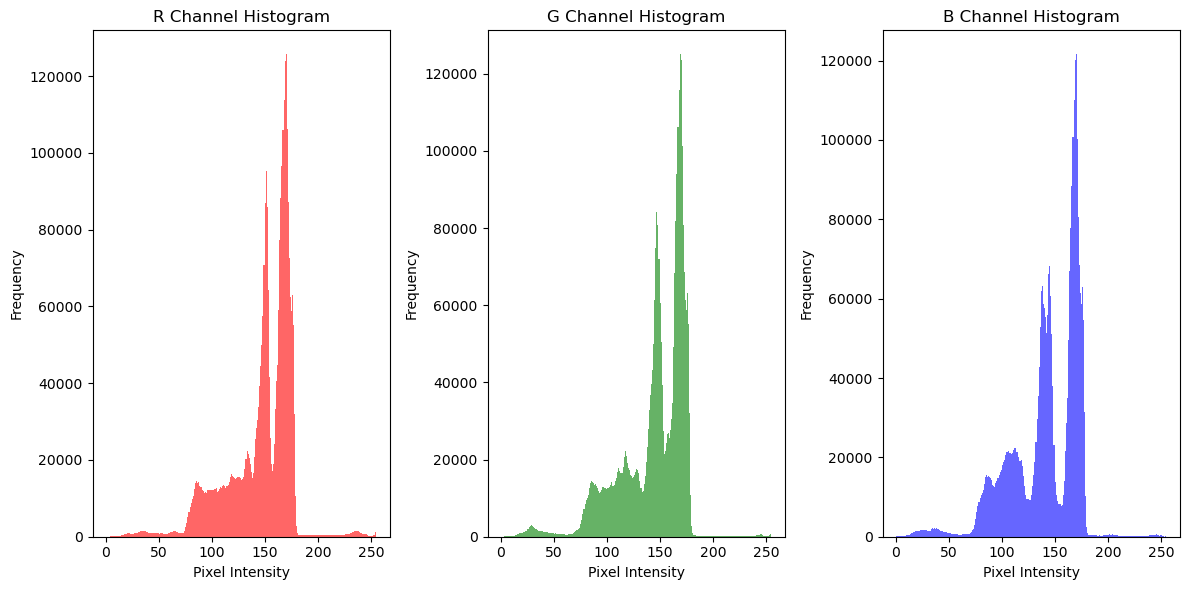

In [6]:
# Menampilkan hasil deteksi warna dan histogramnya
plt.figure(figsize=(15, 10))

# Citra asli
plt.subplot(3, 2, 1)
plt.imshow(img1_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

#Gambar deteksi merah
plt.subplot(3, 2, 2)
plt.imshow(merah_gray, cmap='gray')
plt.title("Deteksi Warna Merah")
plt.axis('off' )

#Gambar deteksi hijau
plt.subplot(3, 2, 3)
plt.imshow(hijau_gray, cmap='gray')
plt.title("Deteksi Warna Hijau")
plt.axis('off')

#Gambar deteksi biru
plt.subplot(3, 2, 4)
plt.imshow(biru_gray, cmap='gray')
plt.title("Deteksi Warna Biru")
plt.axis('off')

# Create histograms for each color channel
color = ('r', 'g', 'b')
plt.figure(figsize=(12, 6))

for i, col in enumerate(color):
    plt.subplot(1, 3, i + 1)
    plt.hist([r.flatten(), g.flatten(), b.flatten()][i], bins=256, color=col, alpha=0.6)
    plt.title(f'{col.upper()} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

### Soal nomor 2

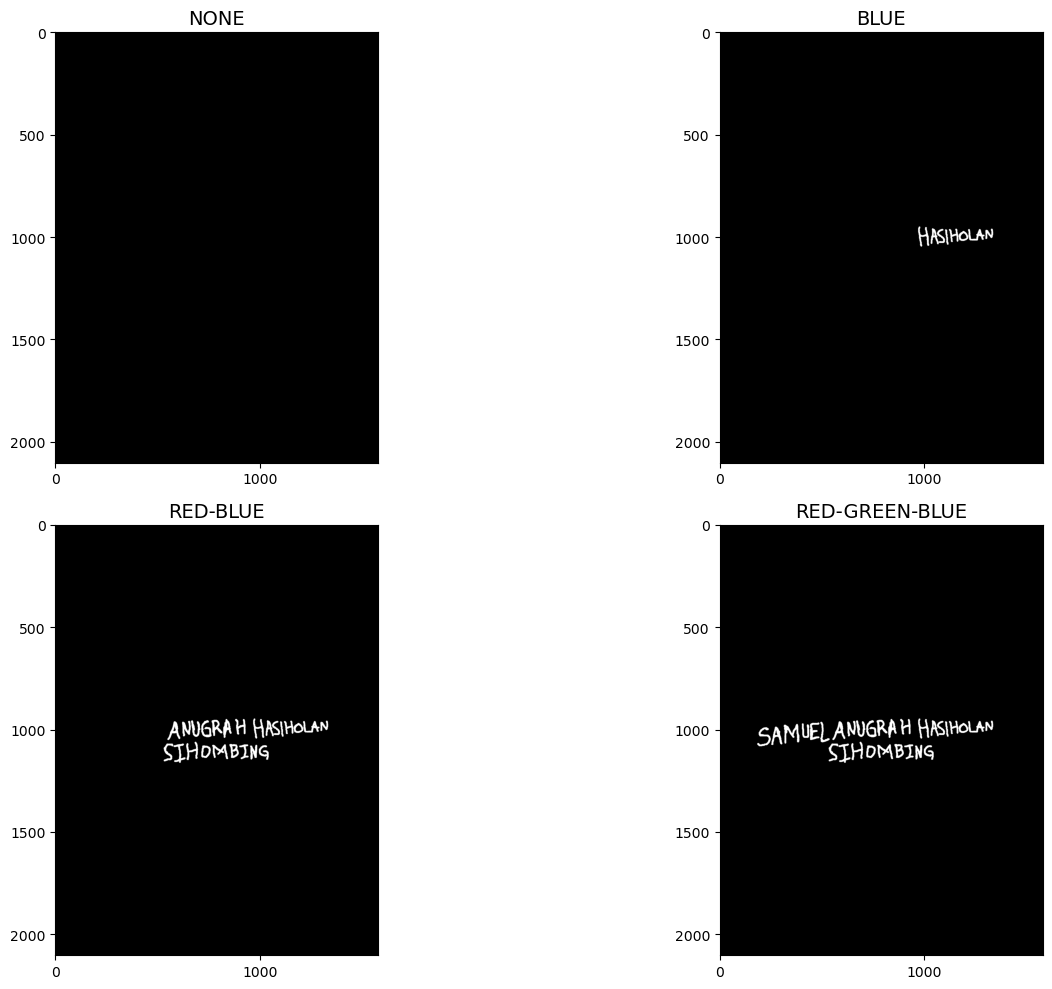

Nilai ambang batas yang digunakan:
Merah (Range 1): Lower = [ 0 60 60], Upper = [ 10 255 255]
Merah (Range 2): Lower = [160  60  60], Upper = [180 255 255]
Hijau: Lower = [40 50 50], Upper = [ 90 255 255]
Biru: Lower = [90 60 60], Upper = [150 255 255]


In [8]:
image = cv2.imread("Nama.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Fungsi untuk mendeteksi warna menggunakan rentang HSV
def detect_color_in_range(lower_bound, upper_bound, image):
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    gray_image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)
    return binary_image

# Rentang HSV untuk warna tertentu
red_lower1 = np.array([0, 60, 60])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([160, 60, 60])
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([40, 50, 50])
green_upper = np.array([90, 255, 255])

# Memperbaiki rentang biru agar lebih sensitif
blue_lower = np.array([90, 60, 60])  # Lebih sensitif untuk biru
blue_upper = np.array([150, 255, 255])  # Menambahkan sedikit rentang lebih lebar untuk biru

# Membuat gambar kosong untuk "NONE"
none_image = np.zeros_like(image_rgb[:, :, 0])

# Mendeteksi warna biru
blue_detected = detect_color_in_range(blue_lower, blue_upper, image_rgb)

# Mendeteksi warna merah dengan dua rentang
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
combined_red_mask = cv2.bitwise_or(mask_red1, mask_red2)
red_image_result = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_red_mask)
red_detected = cv2.cvtColor(red_image_result, cv2.COLOR_RGB2GRAY)
_, red_detected = cv2.threshold(red_detected, 10, 255, cv2.THRESH_BINARY)

# Mendeteksi warna hijau
green_detected = detect_color_in_range(green_lower, green_upper, image_rgb)

# Menggabungkan saluran warna untuk menampilkan kombinasi
red_and_blue = cv2.bitwise_or(red_detected, blue_detected)
all_rgb_combined = cv2.bitwise_or(red_and_blue, green_detected)

# Daftar judul dan gambar
image_titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
image_results = [none_image, blue_detected, red_and_blue, all_rgb_combined]

# Plot gambar hasil deteksi warna
plt.figure(figsize=(16, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image_results[i], cmap='gray')
    plt.title(image_titles[i], fontsize=14)
    plt.xticks(np.arange(0, image.shape[1], 1000))
    plt.yticks(np.arange(0, image.shape[0], 500))

plt.tight_layout()
plt.show()

# Menampilkan nilai ambang batas yang digunakan
print("Nilai ambang batas yang digunakan:")
print(f"Merah (Range 1): Lower = {red_lower1}, Upper = {red_upper1}")
print(f"Merah (Range 2): Lower = {red_lower2}, Upper = {red_upper2}")
print(f"Hijau: Lower = {green_lower}, Upper = {green_upper}")
print(f"Biru: Lower = {blue_lower}, Upper = {blue_upper}")

### Soal nomor 3

In [10]:
#Soal nomor 3
#Load gambar
img2 = cv2.imread('Foto gelap.jpg') 
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [11]:
#Konversi ke Grayscale
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [12]:
#Perbaikan kecerahan (menambah pixel intensity)
def brighten(img2_gray, value=150):
    return cv2.add(img2_gray, value)

#Perbaikan kontras (histogram equalization)
def enhance_contrast(img2_gray):
    return cv2.equalizeHist(img2_gray)

#Perbaikan kecerahan + kontras
bright = brighten(gray)
contrast = enhance_contrast(gray)
bright_contrast = enhance_contrast(bright)

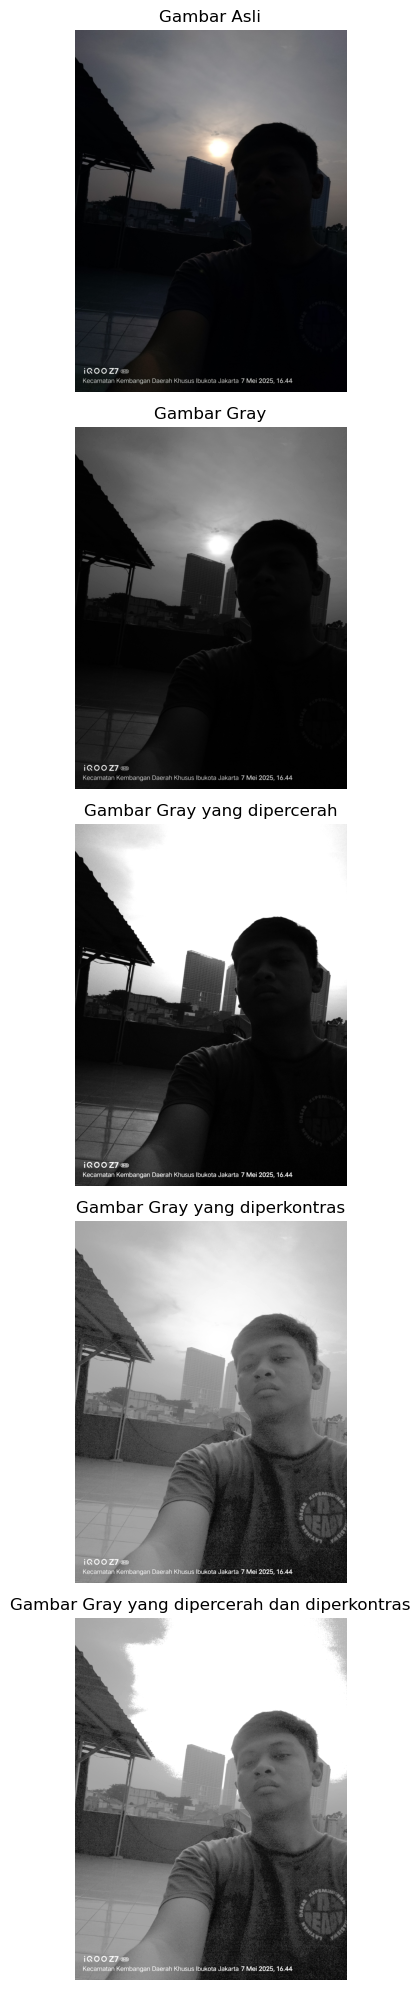

In [13]:
#Plot hasil
titles = ['Gambar Asli', 'Gambar Gray', 'Gambar Gray yang dipercerah', 
          'Gambar Gray yang diperkontras', 'Gambar Gray yang dipercerah dan diperkontras']
images = [img2_rgb, gray, bright, contrast, bright_contrast]
cmaps = [None, 'gray', 'gray', 'gray', 'gray']

plt.figure(figsize=(6, 20))  # Ukuran vertikal
for i in range(len(images)):
    plt.subplot(len(images), 1, i + 1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.axis('off')
    plt.title(titles[i], fontsize=12, ha='center')

plt.tight_layout()
plt.show()